In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
import src.random_matrix as rm
import src.stat_arb as sa
import src.dim_reduction as dr
import statsmodels.api as sm
import math
import importlib

PATH = '/data/hawfinch/clarkson/data/us_eq/cache'

In [6]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

df = df.dropna(thresh=len(df)*.99, axis=1)
df = df.dropna(axis=0)
spy = df['SPY']
df = df.drop('SPY', axis=1)

df_excess = df.apply(lambda x: x - spy)
df_excess

ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,ZBRA,ZEUS,ZION,ZIXI,PKG,SNH,UTSI,SLAB,EPC,EW
date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,0.012937,-0.097531,-0.029607,-0.024211,0.003142,-0.001034,-0.048365,-0.046907,0.028059,-0.048287,...,-0.020812,-0.063554,-0.006948,-0.058037,-0.001034,0.023967,-0.062150,0.043571,-0.001034,-0.004932
2000-03-30,0.009640,-0.026769,0.045454,-0.061019,-0.017021,0.023111,0.014326,-0.125017,0.034643,-0.049811,...,-0.019996,0.048629,-0.014039,-0.151571,0.016881,0.016881,0.006961,-0.074411,-0.004397,-0.022965
2000-03-31,-0.031043,-0.000284,-0.021905,0.065694,0.022616,-0.011285,-0.050404,0.049146,-0.020127,0.022616,...,0.024342,-0.011285,0.071639,-0.049185,0.056433,0.000985,-0.054379,0.029066,-0.013977,-0.136720
2000-04-03,0.012837,-0.073701,-0.009367,-0.024381,-0.031120,-0.012033,0.010030,-0.062960,0.044425,-0.188123,...,-0.047927,-0.037551,-0.045623,-0.134806,-0.023820,-0.018072,-0.121985,-0.195780,-0.093058,0.007928
2000-04-04,-0.007191,0.051748,0.021651,-0.038586,0.069598,0.032158,-0.027158,-0.015676,0.071265,0.189787,...,-0.004338,0.007466,0.047287,-0.144084,-0.017075,0.019736,-0.224258,0.058247,0.010403,0.025484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17,-0.012916,-0.028874,-0.002189,0.000788,0.008289,-0.000994,-0.006112,0.000133,-0.001772,0.011358,...,-0.052587,0.007190,-0.003881,-0.024252,0.001747,-0.003378,0.009521,-0.021766,-0.024588,-0.016469
2019-05-20,-0.014402,-0.048323,0.024551,-0.025135,0.025748,0.006356,-0.003721,-0.024164,0.003998,0.002372,...,-0.026571,-0.011103,0.002190,0.033038,-0.040407,-0.013392,-0.017907,-0.026555,0.000679,0.004668
2019-05-21,0.021809,0.005509,0.015957,0.010014,0.007796,0.001815,0.001643,0.021285,-0.005550,0.010660,...,0.018463,0.031704,0.010434,-0.001404,0.014452,-0.003931,-0.021475,0.023794,0.004142,-0.013500


In [60]:
train = df.iloc[:60,[0,1]]
test = df.iloc[60:120, [0,1]]
train
b1 = lm.LinearRegression().fit(train.iloc[:].values, test.iloc[:,0].values).coef_
print(b1)
b2 = lm.LinearRegression().fit(train.iloc[:].values, test.iloc[:,1].values).coef_
print(b2)
b3 = lm.LinearRegression().fit(train.iloc[:].values, test.iloc[:].values)
print(b3)
# print(b1.coeff_)
# scalar = StandardScaler()
# pca = PCA(n_components=.6)
# corr_pca = Pipeline([('normalize', scalar), ('pca', pca)])
# corr_pca.fit_transform(train)
# print(corr_pca.transform(test).shape)
# pca.n_components_
# plt.scatter(pca.components_[0])

[-0.02367962  0.06070875]
[-0.12229499 -0.17266878]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [129]:
importlib.reload(dr)
importlib.reload(sa)

def clean_nas(data, pct=95):
    data = data.dropna(thresh=(pct/100))
    # TODO: investiage this thresh=len(data)
    return data.dropna(axis=1)

def compute_factor_return(factor, stock_returns, stdevs):
    return factor.dot(stock_returns.values / stdevs)

def score_sign(signal, data):
    return np.sum(data * np.sign(signal))

def backtest(df_lr, df_exc, lookback_window=60, calibration_freq=60, forecast_horizon=10):    
    n_recal = math.ceil(len(df_lr) / float(calibration_freq))
    cal_ix = [i * calibration_freq for i in range(n_recal)]
    residuals = {}
    pv = dr.PcaPctVar(df_lr)
    i = 0
    strat = sa.VolNormOU()
    for index, row in df.iloc[cal_ix[1]:].iterrows():
        ix = df.index.get_loc(index)
        if len(df_lr) - ix < forecast_horizon or ix < lookback_window:
            continue
        # TODO: make this nicer.
        if ix in cal_ix:
            tr_res = pv.estimate_fm_ols(df_lr.iloc[ix-lookback_window:ix+1])
            print(strat.size_pos(tr_res))
        val = df.iloc[ix+1:ix+1+forecast_horizon]
        resid = pd.DataFrame(pv.compute_residuals(val), index=val.index, columns=val.columns.values)
        residuals[index] = resid
        i += 1
        if i % 1000 == 0:
            print('Iteration: {}'.format(i))
    return residuals

scores = backtest(df, df_excess)

ticker
AA     -0.166269
AABA   -0.441764
AAON    0.312806
AAPL   -0.292840
ABC     0.640747
          ...   
SNH    -0.177496
UTSI   -1.290210
SLAB   -0.441863
EPC    -0.233301
EW      0.211549
Length: 1025, dtype: float64
None
ticker
AA     -0.129255
AABA   -0.199376
AAON   -0.096134
AAPL    0.109765
ABC     0.283715
          ...   
SNH     0.099038
UTSI   -0.042959
SLAB   -0.162237
EPC     0.066728
EW      0.022932
Length: 1025, dtype: float64
None
ticker
AA      0.180947
AABA   -1.103410
AAON   -0.050743
AAPL   -1.411903
ABC     0.143921
          ...   
SNH     0.022505
UTSI   -0.195658
SLAB   -1.184914
EPC    -0.105596
EW     -0.233867
Length: 1025, dtype: float64
None
ticker
AA      0.166508
AABA   -0.792953
AAON   -0.104147
AAPL    0.241036
ABC     0.214685
          ...   
SNH     0.101250
UTSI   -0.133934
SLAB   -0.144305
EPC     0.337083
EW      0.215106
Length: 1025, dtype: float64
None
ticker
AA      0.195214
AABA    0.171158
AAON    0.230524
AAPL    0.150534
ABC     0.119

KeyboardInterrupt: 

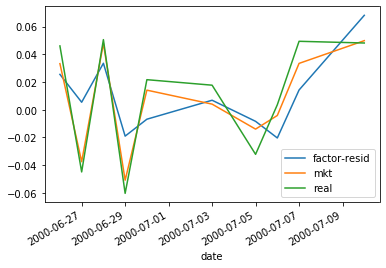

In [120]:
# print(scores[pd.Timestamp('2000-06-23 00:00:00')])
scores[pd.Timestamp('2000-06-23 00:00:00')].loc[:, 'AAPL'].cumsum().plot(label='factor-resid')
df_excess.loc['2000-06-26':'2000-07-10', 'AAPL'].plot(label='mkt')
df.loc['2000-06-26':'2000-07-10', 'AAPL'].plot(label='real')

plt.legend()
plt.show()